3. เลือกข้อมูล 1 อย่างจาก Kaggle มาทำการ visualize ข้อมูลในรูปแบบกราฟต่างๆ


In [10]:
!pip install -U kora

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.6.14)


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
from kora import kaggle

In [18]:
kaggle.search('titanic')

,ref,title,size,lastUpdated,downloadCount
0,heptapod/titanic,Titanic,11KB,2017-05-16 08:14:22,14263
1,azeembootwala/titanic,Titanic,12KB,2017-06-05 12:14:37,6616
2,prkukunoor/TitanicDataset,Titanic,135KB,2017-01-03 22:01:13,3349
3,broaniki/titanic,titanic,717KB,2018-01-30 04:08:45,7280
4,hesh97/titanicdataset-traincsv,Titanic-Dataset (train.csv),22KB,2018-02-02 04:51:06,26207
5,kittisaks/testtitanic,test titanic,22KB,2017-03-13 15:13:12,1306
6,fossouodonald/titaniccsv,Titanic csv,1KB,2016-11-07 09:44:58,5203
7,jamesleslie/titanic-cleaned-data,Titanic: cleaned data,36KB,2018-11-21 11:50:18,2291
8,pavlofesenko/titanic-extended,Titanic extended dataset (Kaggle + Wikipedia),134KB,2019-03-06 09:53:24,3485
9,rahulsah06/titanic,Titanic,34KB,2019-09-16 14:43:23,242


In [19]:
kaggle.ls('shuofxz/titanic-machine-learning-from-disaster')

,name,size,creationDate
0,train.csv,60KB,2017-10-15 10:05:34
1,test.csv,28KB,2017-10-15 10:05:34


In [20]:
kaggle.download('shuofxz/titanic-machine-learning-from-disaster')

  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 27.2MB/s]


In [21]:
!ls -al

ls: cannot access 'gdrive': Transport endpoint is not connected
total 108
drwxr-xr-x 1 root root  4096 Sep 21 16:42 .
drwxr-xr-x 1 root root  4096 Sep 21 16:37 ..
drwxr-xr-x 1 root root  4096 Sep 18 16:15 .config
drwx------ 4 root root  4096 Sep 21 16:41 drive
d????????? ? ?    ?        ?            ? gdrive
drwxr-xr-x 1 root root  4096 Sep 16 16:29 sample_data
-rw-r--r-- 1 root root 28629 Sep 21 16:42 test.csv
-rw-r--r-- 1 root root 61194 Sep 21 16:42 train.csv


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
df = pd.read_csv('train.csv')

In [24]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
#จัดกลุ่มอายุ
age_cat = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
df['Age_Group'] = pd.cut(df.Age,
                         bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.Inf],
                         labels = age_cat,
                         right = True,
                         include_lowest = True)

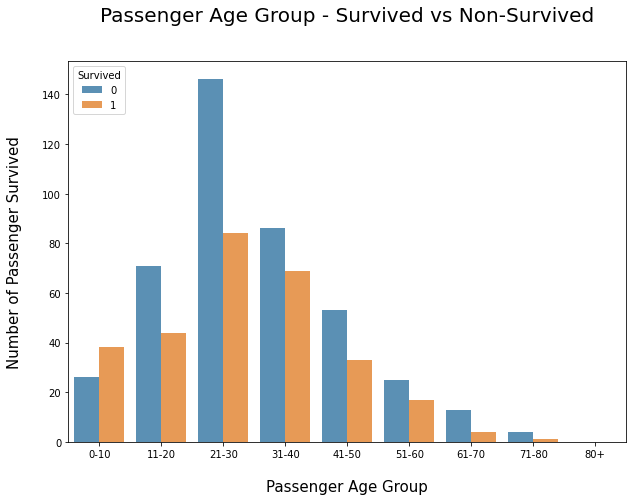

In [27]:
fig = plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Age_Group', hue='Survived', alpha=.8)
plt.title('Passenger Age Group - Survived vs Non-Survived', fontsize=20, pad=40)
plt.ylabel('Number of Passenger Survived', fontsize=15, labelpad=20)
plt.xlabel('Passenger Age Group', fontsize=15,labelpad=20);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


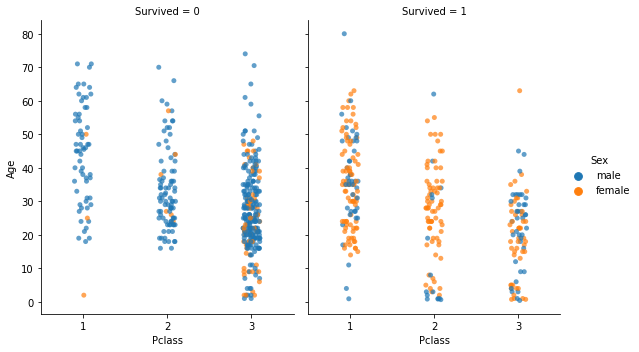

In [31]:
g = sns.catplot(x='Pclass', y='Age',
                hue='Sex', col='Survived',
                data=df, kind="strip",
                height=6, aspect=.8, alpha=.7, size=5)
#plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 20, pad = 50);

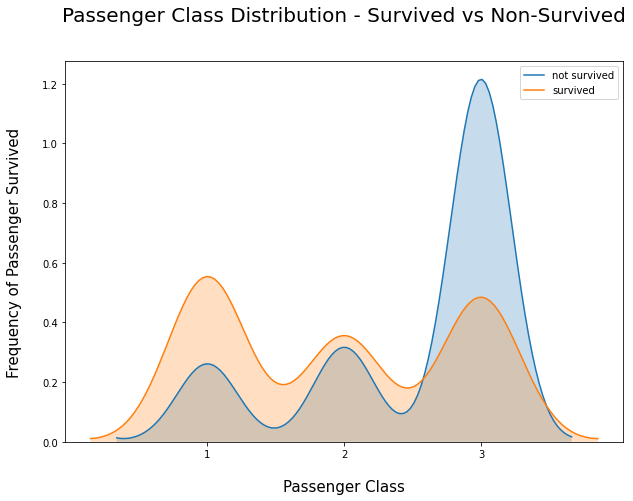

In [32]:
fig = plt.figure(figsize=(10,7))
ax=sns.kdeplot(df.Pclass[df.Survived == 0], shade=True, label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'], shade=True, label='survived'
)
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 20, pad = 40)
plt.ylabel('Frequency of Passenger Survived', fontsize = 15, labelpad = 20)
plt.xlabel('Passenger Class', fontsize = 15,labelpad =20)
labels = ['1', '2', '3']
plt.xticks(sorted(df.Pclass.unique()), labels);
